<a href="https://colab.research.google.com/github/MumbuaFaithK/ai-and-data-projects/blob/main/MNIST_ANN_Image_Classification_FaithMumbua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Handwritten Digit Classification using ANN

## Objective
To build, train, and evaluate a deep learning model using the MNIST dataset for handwritten digit recognition using TensorFlow/Keras.

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

## 2. Load and Explore the Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Sample label:", y_train[0])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Sample label: 5


## 3. Visualize Random Digits

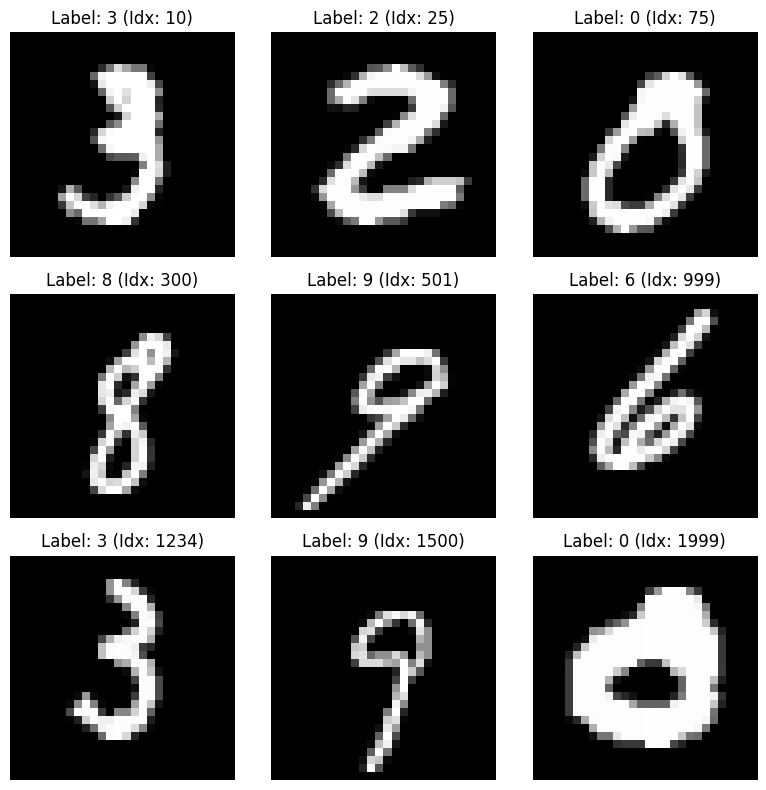

In [3]:
selected_indices = [10, 25, 75, 300, 501, 999, 1234, 1500, 1999]
plt.figure(figsize=(8, 8))

for i, idx in enumerate(selected_indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(f"Label: {y_train[idx]} (Idx: {idx})")
    plt.axis('off')

plt.tight_layout()
plt.show()


## 4. Data Preprocessing

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("X_train shape:", X_train.shape)
print("y_train_cat shape:", y_train_cat.shape)

X_train shape: (60000, 28, 28)
y_train_cat shape: (60000, 10)


## 5. Build the ANN Model

In [5]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## 6. Compile the Model

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 7. Train the Model

In [7]:
history = model.fit(X_train, y_train_cat,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7124 - loss: 0.9059 - val_accuracy: 0.9545 - val_loss: 0.1617
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9215 - loss: 0.2694 - val_accuracy: 0.9687 - val_loss: 0.1142
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9398 - loss: 0.2073 - val_accuracy: 0.9737 - val_loss: 0.0943
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9513 - loss: 0.1640 - val_accuracy: 0.9743 - val_loss: 0.0925
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9578 - loss: 0.1462 - val_accuracy: 0.9785 - val_loss: 0.0768
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9623 - loss: 0.1255 - val_accuracy: 0.9780 - val_loss: 0.0770
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9627 - loss: 0.1224 - val_accuracy: 0.9787 - val_loss: 0.0748
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9668 - loss: 0.1126 - val_accuracy: 0.

## 8. Visualize Training History

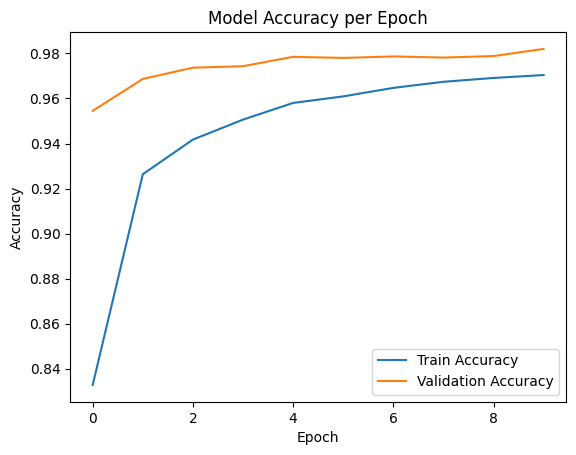

In [8]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 9. Evaluate the Model

In [9]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9767 - loss: 0.0827
Test Accuracy: 0.9793


## 10. Predictions and Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


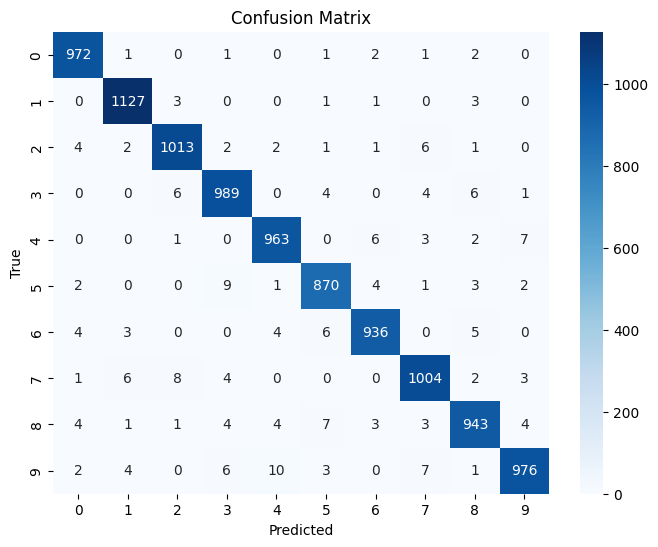

In [10]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## 11. Classification Report

In [11]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## 12. Save and Reload the Model

In [12]:
model.save("mnist_ann_model.h5")
reloaded_model = load_model("mnist_ann_model.h5")
reloaded_model.evaluate(X_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9767 - loss: 0.0827


[0.07348702847957611, 0.9793000221252441]